In [ ]:
pip install quandl

In [1]:
### This program predicts stock prices using machine learning model, namely Support Vector Machine and Linear Regression


In [2]:
#Import the dependecies
import quandl
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

In [4]:
# Get the stock data
df1 = quandl.get("WIKI/FB")
print(df1.head())

             Open   High    Low    Close       Volume  Ex-Dividend  \
Date                                                                 
2012-05-18  42.05  45.00  38.00  38.2318  573576400.0          0.0   
2012-05-21  36.53  36.66  33.00  34.0300  168192700.0          0.0   
2012-05-22  32.61  33.59  30.94  31.0000  101786600.0          0.0   
2012-05-23  31.37  32.50  31.36  32.0000   73600000.0          0.0   
2012-05-24  32.95  33.21  31.77  33.0300   50237200.0          0.0   

            Split Ratio  Adj. Open  Adj. High  Adj. Low  Adj. Close  \
Date                                                                  
2012-05-18          1.0      42.05      45.00     38.00     38.2318   
2012-05-21          1.0      36.53      36.66     33.00     34.0300   
2012-05-22          1.0      32.61      33.59     30.94     31.0000   
2012-05-23          1.0      31.37      32.50     31.36     32.0000   
2012-05-24          1.0      32.95      33.21     31.77     33.0300   

           

In [5]:
# Get the adjusted close price
df = df1[['Adj. Close']]
df.head()

,Adj. Close
Date,
2012-05-18,38.2318
2012-05-21,34.0300
2012-05-22,31.0000
2012-05-23,32.0000
2012-05-24,33.0300


In [13]:
# create a variable for predicting 'n' days out into the future
forecast_out = 30
# create another column (the target or dependent variable) shifted 'n' units up
df['Prediction'] = df[['Adj. Close']].shift(-forecast_out)
print(df.tail())

            Adj. Close  Prediction
Date                              
2018-03-21      169.39         NaN
2018-03-22      164.89         NaN
2018-03-23      159.39         NaN
2018-03-26      160.06         NaN
2018-03-27      152.19         NaN


C:\Users\aa\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [14]:
# Create  the independent dataset (X) 
# convert the dataframe into a numpy array
X = np.array(df.drop(['Prediction'],1))
# remove the last 'n' rows
X = X[:-forecast_out] 
print(X)

[[ 38.2318]
 [ 34.03  ]
 [ 31.    ]
 ...
 [171.5499]
 [175.98  ]
 [176.41  ]]


In [15]:
# create the dependent dataset (y)
# convert the dataframe to a numpy array (All of the values including Nan's)
y = np.array(df['Prediction'])
# get all the values of 'y' except the last 'n' rows 
y = y[:-forecast_out]
print(y)

[ 30.771  31.2    31.47  ... 159.39  160.06  152.19 ]


In [17]:
# Split the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [18]:
# create and train the Support Vector Machine (regressor)
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_rbf.fit(X_train, y_train)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [19]:
# Testing model: Score returns the coeficient of dtermination R^2 of the prediction
svm_confidence = svr_rbf.score(X_test, y_test)
print("svm_confidence: ", svm_confidence)

svm_confidence:  0.9817759648351094


In [20]:
# create and train the Linear Regression Model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
# Testing model: Score returns the coeficient of dtermination R^2 of the prediction
lr_confidence = lr.score(X_test, y_test)
print("lr_confidence: ", lr_confidence)

lr_confidence:  0.9809877483238647


In [26]:
# set x_forecast equal to the last n rows of the original dataset from Adj. Close column
x_forecast = np.array(df.drop(['Prediction'],1))[-forecast_out:]
x_forecast

array([[173.15],
       [179.52],
       [179.96],
       [177.36],
       [176.01],
       [177.91],
       [178.99],
       [183.29],
       [184.93],
       [181.46],
       [178.32],
       [175.94],
       [176.62],
       [180.4 ],
       [179.78],
       [183.71],
       [182.34],
       [185.23],
       [184.76],
       [181.88],
       [184.19],
       [183.86],
       [185.09],
       [172.56],
       [168.15],
       [169.39],
       [164.89],
       [159.39],
       [160.06],
       [152.19]])

In [27]:
# print linear regression model predictions for the next 'n' days
lr_prediction = lr.predict(x_forecast)
print(lr_prediction)

# print support vector regressor model prediction for the next 'n' days
svm_prediction = svr_rbf.predict(x_forecast)
print(svm_prediction)

[176.98270983 183.41527574 183.85959741 181.2340603  179.87080065
 181.78946238 182.8800701  187.22230455 188.87841257 185.37433035
 182.20348939 179.80011311 180.48679205 184.30391907 183.67782945
 187.64642977 186.26297368 189.18135916 188.70674284 185.79845558
 188.13114432 187.79790307 189.03998408 176.38691487 171.93360001
 173.18577924 168.6415804  163.0875596  163.76414031 155.81684145]
[176.7931505  181.00598089 180.4894497  175.48840041 175.01951593
 177.3774767  180.83072295 179.5762231  178.80831361 179.65313431
 179.00068796 175.08688958 174.59140635 179.83610967 180.74464369
 178.92425066 180.32795626 179.36506987 178.58530593 180.04727793
 178.42615343 178.72276684 179.08226606 178.1868873  171.54713131
 171.80768539 172.12586795 167.6053916  166.90347997 157.87123848]


In [28]:
# Plot a linear graph for comparing two predictions
import matplotlib.pyplot as plt

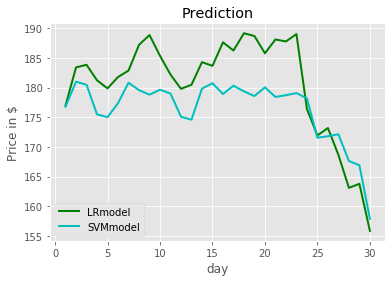

In [37]:
plt.style.use('ggplot')
x = np.arange(1,31)
y1 = lr_prediction
y2 = svm_prediction
plt.plot(x,y1,'g', label='LRmodel', linewidth=2)
plt.plot(x,y2,'c', label='SVMmodel', linewidth =2)
plt.title('Prediction')
plt.xlabel('day')
plt.ylabel('Price in $')
plt.legend()

plt.show()
